In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [2]:
#松弛变量为max(0,1-y(wx-b))
def HingeLoss(X,y,w):
    n_sample = X.shape[0]
    f1 = np.ones((n_sample,1)) - y * np.dot(X,w)
    #f_sum = 0
    for i in range (n_sample):
        if(f1[i,0] < 0):
            f1[i,0] = 0
    return f1 #返回值为记录松弛变量的列向量

In [3]:
#损失函数为 【((w.T)w)/2 + c * Hingeloss】/n
def Loss(X,y,w):
#    c = 100
    n_sample = X.shape[0]
    loss = np.dot(w.T,w)/2 + c * np.sum(HingeLoss(X,y,w))
    loss = loss/n_sample
    return (loss[0,0])

In [4]:
def Gradient(X,y,w):
 #   c = 100
    n_sample,n_feature = X.shape
    f1 = np.ones((n_sample,1)) - y * np.dot(X,w)  # 1-y(Xw+b) ,用来判断下一步的梯度
    gradient = np.zeros((1,n_feature))
    for i in range (n_sample):
        if(f1[i,0] < 0):
            gradient = gradient + w.T;  # (1-y(Xw+b)) < 0,梯度为 w.T
        else:
            gradient = gradient + w.T - (c * np.dot(y.T,X)) # (1-y(Xw+b)) >= 0,梯度为 w.T -c*((y.T)X)
    gradient = gradient/n_sample
    return gradient

In [5]:
def GradientDescent(X,y,w,iteration,lr,train_loss,X_test,y_test,test_loss):
    for i in range(iteration):
        gradient = Gradient(X,y,w)
        w = w - lr * gradient.T
        train_loss.append(Loss(X,y,w))
        test_loss.append(Loss(X_test,y_test,w))
    return w

In [6]:
def Right_rate(X_train,y_train,X_test,y_test,w):
    n_test = X_test.shape[0]  #验证集数量
    result = np.dot(X_test,w) # 记录 (wx -b)

    hingeloss = HingeLoss(X_train,y_train,w) #计算松弛变量
    n = 0  #记录松弛变量>0的个数
    sum_hinge = 0 #记录松弛变量>0的松弛变量的和
    for i in range(X_train.shape[0]):
        if(hingeloss[i,0] > 0):
            n = n+1
            sum_hinge += hingeloss[i,0]
    hinge = sum_hinge/n   #松弛变量值的均值(为0的不参与平均）
    for i in range(n_test):
        if(result[i] >(1-hinge)):
            result[i] = 1
        else:
            result[i] = -1

    n = 0
    for i in range(n_test):  #计算判断正确的个数
           if(result[i,0] == y_test[i,0]):
                n += 1

    right_rate = n/n_test #计算正确率
    return right_rate

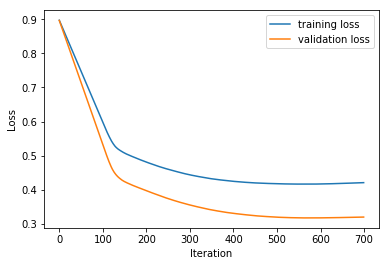

准确率为： 0.868421052631579


In [8]:
data = load_svmlight_file("/home/wade/文档/australian_scale.txt")
X = data[0].toarray()
y = data[1]
n_data,n_feature = X.shape
X = np.c_[X,np.ones((n_data,1))]
y = y.reshape(n_data,1)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

w = np.zeros((n_feature+1,1))
iteration = 700
lr = 0.00001
c = 0.9
train_loss = []
test_loss = []
w = GradientDescent(X_train,y_train,w,iteration,lr,train_loss,X_test,y_test,test_loss)
plt.plot(range(iteration),train_loss,label ='training loss')
plt.plot(range(iteration),test_loss,label ='validation loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()
right_rate = Right_rate(X_train,y_train,X_test,y_test,w)
print('准确率为：',right_rate)